In [1]:
import numpy as np 
import corner as DFM
from pydl.pydlutils.spheregroup import spherematch
# -- local -- 
import env
import util as UT
from ChangTools.fitstables import mrdfits

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as pl 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

Read in GAMA data

In [5]:
gama = mrdfits(UT.dat_dir()+'InputCatA.fits')
specdata = mrdfits(UT.dat_dir()+'SpecLines.fits')
print 'colums in InputCatA.fits'
print len(gama.ra)
print gama.__dict__.keys()
print '========================'
print 'colums in SpecLines.fits'
print len(specdata.ra)
print specdata.__dict__.keys()

colums in InputCatA.fits
960510
['psfmag_r', 'modelmag_g', 'modelmag_i', 'modelmag_r', 'modelmag_u', 'modelmag_z', 'petror50_r', 'petromag_i', 'petror90_r', 'petromag_g', 'cataid', 'petromag_z', 'objid', 'petromag_r', 'petromag_u', 'ra', 'status', 'run', 'flags_r', 'primtarget', 'fibermag_r', 'flags', 'petrorad_r', 'extinction_r', 'dec']
colums in SpecLines.fits
57048
['niiberr', 'oiiberr', 'oiiibsig', 'ioi6300err', 'ihderr', 'ioi6364', 'niibsig', 'img', 'oiirsigerr', 'iniiberr', 'inad', 'oiiir', 'oiirsig', 'z_helio', 'oiiib', 'is_sbest', 'inevrerr', 'specid', 'ioiiib', 'niirew', 'imgerr', 'niirerr', 'ioiiir', 'hbsigerr', 'haew', 'niibsigerr', 'ihberr', 'oiiirsig', 'isiib', 'oiiibew', 'oiierr', 'isiir', 'oiiiberr', 'siirsig', 'iniirerr', 'niirsigerr', 'ioi6300', 'ra', 'ioii', 'oiirerr', 'isiirerr', 'oiiibsigerr', 'hasig', 'dec', 'iniib', 'oiib', 'hberr', 'hbsig', 'oiir', 'oiirew', 'siib', 'siibsig', 'ioi6364err', 'ihb', 'iha', 'siir', 'ihd', 'haerr', 'ioiierr', 'niib', 'ihaerr', 'oiiir

some cuts on the photometric and spectroscopic data

In [17]:
cut_photo = ((gama.modelmag_u > -9999.) & (gama.modelmag_g > -9999.) & (gama.modelmag_r > -9999.) & 
             (gama.modelmag_i > -9999.) & (gama.modelmag_z > -9999.))
cut_spec = (specdata.ha > -99.)

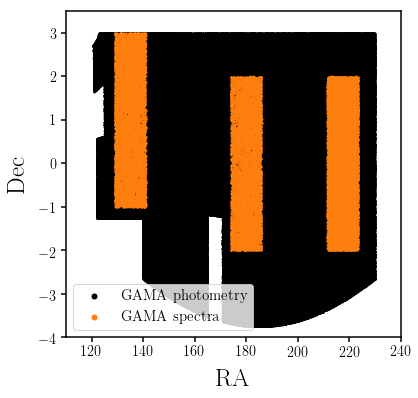

In [18]:
fig = plt.figure(figsize=(6,6))
bkgd = fig.add_subplot(111, frameon=False)
bkgd.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
bkgd.set_xlabel('RA', labelpad=10, fontsize=25)
bkgd.set_ylabel('Dec', labelpad=10, fontsize=25)

sub = fig.add_subplot(111)
sub.scatter(gama.ra[cut_photo], gama.dec[cut_photo], c='k', s=1, label='GAMA photometry')
sub.scatter(specdata.ra[cut_spec], specdata.dec[cut_spec], c='C1', s=1, label='GAMA spectra')
sub.set_xlim([110., 240.])
sub.set_ylim([-4., 3.5])
sub.legend(loc='lower left', frameon=True, markerscale=5, prop={'size':15})

Lets match up the GAMA photometry to spectroscopy

In [19]:
match = spherematch(gama.ra[cut_photo], gama.dec[cut_photo], 
                    specdata.ra[cut_spec], specdata.dec[cut_spec], 0.000277778)

In [21]:
assert np.max(np.abs((gama.ra[cut_photo])[match[0]]-(specdata.ra[cut_spec])[match[1]])) < 0.1

In [22]:
u_mag = (gama.modelmag_u[cut_photo])[match[0]]
g_mag = (gama.modelmag_g[cut_photo])[match[0]]
r_mag = (gama.modelmag_r[cut_photo])[match[0]]
i_mag = (gama.modelmag_i[cut_photo])[match[0]]
z_mag = (gama.modelmag_z[cut_photo])[match[0]]

In [23]:
halpha    = (specdata.ha[cut_spec])[match[1]]
halpha_ew = (specdata.haew[cut_spec])[match[1]]

In [25]:
print 'N_gal photometry = ', np.sum(cut_photo)
print 'N_gal spectra = ', np.sum(cut_spec)
print 'N_gal matched = ', len(match[0])

N_gal photometry =  960477
N_gal spectra =  41350
N_gal matched =  40509


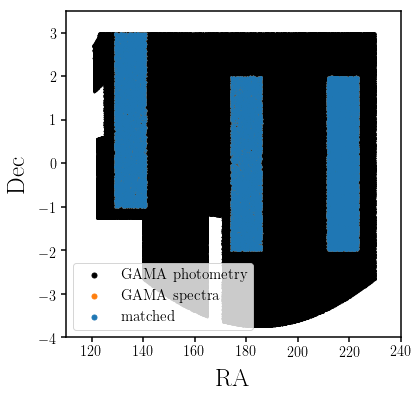

In [24]:
fig = plt.figure(figsize=(6,6))
bkgd = fig.add_subplot(111, frameon=False)
bkgd.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
bkgd.set_xlabel('RA', labelpad=10, fontsize=25)
bkgd.set_ylabel('Dec', labelpad=10, fontsize=25)

sub = fig.add_subplot(111)
sub.scatter(gama.ra[cut_photo], gama.dec[cut_photo], c='k', s=1, label='GAMA photometry')
sub.scatter(specdata.ra[cut_spec], specdata.dec[cut_spec], c='C1', s=1, label='GAMA spectra')
sub.scatter((gama.ra[cut_photo])[match[0]], (gama.dec[cut_photo])[match[0]], c='C0', s=1, label='matched')
sub.set_xlim([110., 240.])
sub.set_ylim([-4., 3.5])
sub.legend(loc='lower left', frameon=True, markerscale=5, prop={'size':15})

Lets look at the relationship between $H_\alpha$ and different galaxy colors

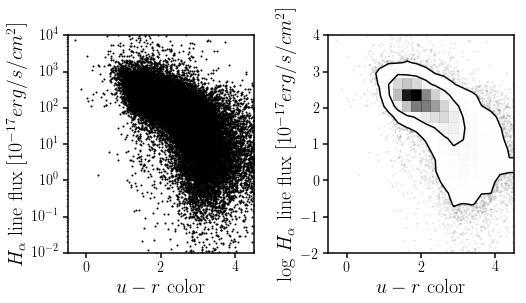

In [26]:
fig = plt.figure(figsize=(8,4))
sub = fig.add_subplot(121)
sub.scatter(u_mag - r_mag, halpha, c='k', s=1)
sub.set_xlim([-0.5, 4.5])
sub.set_xlabel('$u - r$ color', fontsize=20)
sub.set_yscale('log')
sub.set_ylim([1e-2, 1e4])
sub.set_ylabel(r'$H_\alpha$ line flux $[10^{-17}erg/s/cm^2]$', fontsize=20)

sub = fig.add_subplot(122)
DFM.hist2d(u_mag - r_mag, np.log10(halpha), levels=[0.68, 0.95], range=[[-0.5, 4.5], [-2, 4]], ax=sub)
sub.set_xlabel('$u - r$ color', fontsize=20)
sub.set_ylabel(r'$\log\,H_\alpha$ line flux $[10^{-17}erg/s/cm^2]$', fontsize=20)
fig.subplots_adjust(wspace=0.4)

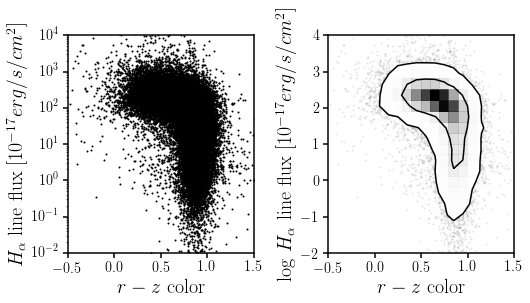

In [27]:
fig = plt.figure(figsize=(8,4))
sub = fig.add_subplot(121)
sub.scatter(r_mag - z_mag, halpha, c='k', s=1)
sub.set_xlim([-0.5, 1.5])
sub.set_xlabel('$r - z$ color', fontsize=20)
sub.set_yscale('log')
sub.set_ylim([1e-2, 1e4])
sub.set_ylabel(r'$H_\alpha$ line flux $[10^{-17}erg/s/cm^2]$', fontsize=20)

sub = fig.add_subplot(122)
DFM.hist2d(r_mag - z_mag, np.log10(halpha), levels=[0.68, 0.95], range=[[-0.5, 1.5], [-2, 4]], ax=sub)
sub.set_xlabel('$r - z$ color', fontsize=20)
sub.set_ylabel(r'$\log\,H_\alpha$ line flux $[10^{-17}erg/s/cm^2]$', fontsize=20)
fig.subplots_adjust(wspace=0.4)

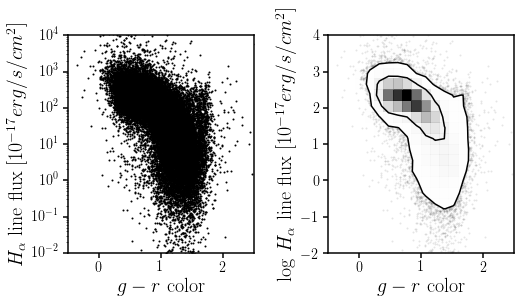

In [28]:
fig = plt.figure(figsize=(8,4))
sub = fig.add_subplot(121)
sub.scatter(g_mag - r_mag, halpha, c='k', s=1)
sub.set_xlim([-0.5, 2.5])
sub.set_xlabel('$g - r$ color', fontsize=20)
sub.set_yscale('log')
sub.set_ylim([1e-2, 1e4])
sub.set_ylabel(r'$H_\alpha$ line flux $[10^{-17}erg/s/cm^2]$', fontsize=20)

sub = fig.add_subplot(122)
DFM.hist2d(g_mag - r_mag, np.log10(halpha), levels=[0.68, 0.95], range=[[-0.5, 2.5], [-2, 4]], ax=sub)
sub.set_xlabel('$g - r$ color', fontsize=20)
sub.set_ylabel(r'$\log\,H_\alpha$ line flux $[10^{-17}erg/s/cm^2]$', fontsize=20)
fig.subplots_adjust(wspace=0.4)